# 2019/02/15    - test campaign 2, day 5

##     4.8 Optimize M1-M3-M1 figure using LSST bending modes (2 iterations)
##    5.2 Optimize M1-M3-M1 figure using LSST bending modes and older baseline forces (4 iterations)

In [1]:
from M1M3tools import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import glob
import pandas as pd

%matplotlib inline
plt.jet()

dateID = 190215

<Figure size 432x288 with 0 Axes>

4-8 bend0 ------ irow = 0, icol = 0, -----------------------------
/Processed/190215_4-8 LSST BM1/M1 set0 190215 4-8.h5: Fri Feb 15 09:10:57 2019 
4-8 bend1 ------ irow = 0, icol = 1, -----------------------------
/Processed/190215_4-8 LSST BM1/M1 set1 190215 4-8.h5: Fri Feb 15 09:43:46 2019 
/Processed/190215_4-8 LSST BM1/M3 set1 190215 4-8.h5: Fri Feb 15 09:45:31 2019 


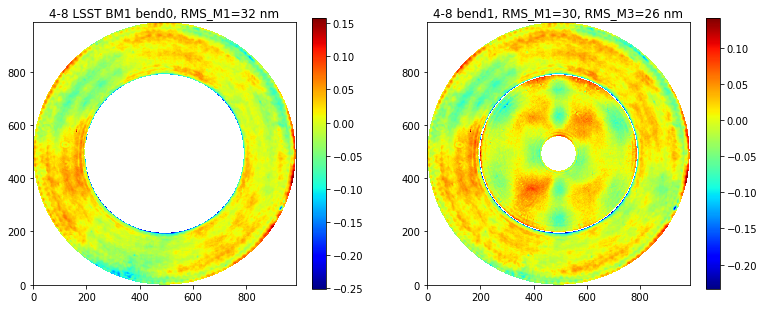

In [2]:
testID = '4-8'
iter = ' LSST BM1'
fig, ax = plt.subplots(1,3,figsize=(20,5*1))
i = 0
for bend in range(2):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))

    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M1 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M3 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    if len(fileset) == 0:
        pass
    else:
        m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset)

    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    if len(fileset) == 0:
        img = ax[icol].imshow(m1s, origin='lowerleft')
        ax[icol].set_title('%s%s bend%d, RMS_M1=%.0f nm'%(testID,iter, bend, m1rms))
    else:
        [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
        [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
        s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
        img = ax[icol].imshow(s, origin='lowerleft')  
        ax[icol].set_title('%s bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, bend, m1rms, m3rms))
    fig.colorbar(img, ax=ax[icol])

fig.delaxes(ax.flatten()[-1])    

/Users/bxin/largeData/M1M3_ML/Processed/190215_4-8 LSST BM1/M1 set0 190215 4-8 -FC fit mode amps.csv
/Users/bxin/largeData/M1M3_ML/Processed/190215_4-8 LSST BM1/M1M3 set1 190215 4-8M1M3 fit mode amps.csv


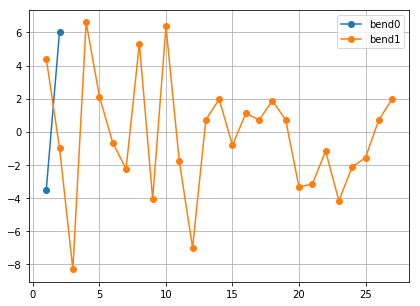

In [3]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
for bend in range(2):
    csvName = '%s/Processed/%d_%s%s/M1M3 set%d %s %sM1M3 fit mode amps.csv'%(
            dataDir, dateID, testID, iter, bend, dateID, testID)
    if not os.path.isfile(csvName):
        csvName = '%s/Processed/%d_%s%s/M1 set%d %s %s -FC fit mode amps.csv'%(
            dataDir, dateID, testID, iter, bend, dateID, testID)
    print(csvName)
    df = pd.read_csv(csvName, header=None)
    ax[0].plot(df[0], df[1], '-o', label='bend%d'%bend)
    ax[1].plot(df[0], df[1], '-o', label='bend%d'%bend)
leg = ax[0].legend()
leg = ax[1].legend()
ax[0].grid()
ax[1].grid()
ax[1].set_title('zoom-in on on y')
aa = ax[1].set_ylim([-50, 50])
fig.delaxes(ax.flatten()[-1]) 

### Iteration 0 (bend0) below is same as iteration 1 (bend1) above

4-8 bend0 ------ irow = 0, icol = 0, -----------------------------
/Processed/190215_4-8 M1M3M1/M1 set0 190215 4-8.h5: Fri Feb 15 09:10:57 2019 
/Processed/190215_4-8 M1M3M1/M3 set0 190215 4-8.h5: Fri Feb 15 09:12:53 2019 


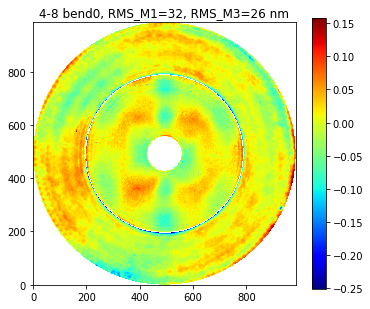

In [4]:
testID = '4-8'
iter = ' M1M3M1'
fig, ax = plt.subplots(1,3,figsize=(20,5*1))
i = 0
for bend in range(1):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))

    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M1 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M3 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    if len(fileset) == 0:
        pass
    else:
        m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset)

    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    if len(fileset) == 0:
        img = ax[icol].imshow(m1s, origin='lowerleft')
        ax[icol].set_title('%s%s bend%d, RMS_M1=%.0f nm'%(testID,iter, bend, m1rms))
    else:
        [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
        [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
        s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
        img = ax[icol].imshow(s, origin='lowerleft')  
        ax[icol].set_title('%s bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, bend, m1rms, m3rms))
    fig.colorbar(img, ax=ax[icol])
fig.delaxes(ax.flatten()[-2]) 
fig.delaxes(ax.flatten()[-1])    

### If we have optimized M1M3 using 153 bending modes, the high spatial frequence pattern is still present

4-8 bend1 ------ irow = 0, icol = 0, -----------------------------
/Users/bxin/largeData/M1M3_ML/Processed/190215_4-8 LSST BM1-153/M1M3 set1 190215 4-8M1M3 fit -153modes.h5
/Processed/190215_4-8 LSST BM1-153/M1M3 set1 190215 4-8M1M3 fit -153modes.h5: Fri Feb 15 09:43:46 2019 
/Processed/190215_4-8 LSST BM1-153/M1M3 set1 190215 4-8M1M3 fit -153modes.h5: Fri Feb 15 09:45:31 2019 


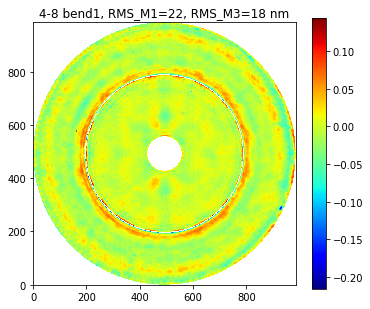

In [5]:
testID = '4-8'
iter = ' LSST BM1-153'
fig, ax = plt.subplots(1,3,figsize=(20,5*1))
i = 0
for bend in range(1,2):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))
    pattern = '%s/Processed/%d_%s%s/M1M3 set%d %s %sM1M3 fit -153modes.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)
    fileset = sorted(glob.glob(pattern))
    print(pattern)
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset,'/M1Data')
    m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset,'/M3Data')
        
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    if len(fileset) == 0:
        img = ax[irow][icol].imshow(m1s, origin='lowerleft')
        ax[irow][icol].set_title('%s%s bend%d, RMS_M1=%.0f nm'%(testID,iter, bend, m1rms))
    else:
        [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
        [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
        s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
        img = ax[icol].imshow(s, origin='lowerleft')  
        ax[icol].set_title('%s bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, bend, m1rms, m3rms))
    fig.colorbar(img, ax=ax[icol])

fig.delaxes(ax.flatten()[-1])    
fig.delaxes(ax.flatten()[-2])   

/Users/bxin/largeData/M1M3_ML/Processed/190215_4-8 LSST BM1-153/M1M3 set1 190215 4-8M1M3 fit mode amps.csv


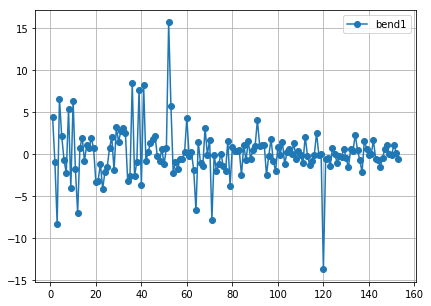

In [6]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
for bend in range(1,2):
    csvName = '%s/Processed/%d_%s%s/M1M3 set%d %s %sM1M3 fit mode amps.csv'%(
            dataDir, dateID, testID, iter, bend, dateID, testID)
    if not os.path.isfile(csvName):
        csvName = '%s/Processed/%d_%s%s/M1 set%d %s %s -FC fit mode amps.csv'%(
            dataDir, dateID, testID, iter, bend, dateID, testID)
    print(csvName)
    df = pd.read_csv(csvName, header=None)
    ax[0].plot(df[0], df[1], '-o', label='bend%d'%bend)
    ax[1].plot(df[0], df[1], '-o', label='bend%d'%bend)
leg = ax[0].legend()
leg = ax[1].legend()
ax[0].grid()
ax[1].grid()
ax[1].set_title('zoom-in on on y')
aa = ax[1].set_ylim([-50, 50])
fig.delaxes(ax.flatten()[-1]) 

### Another round of optimization. This time, with the mirror in new (this week’s) position, using forces from campaign 1. We wanted to see how sensitive the optimization is to mirror position.

5-2 bend0 ------ irow = 0, icol = 0, -----------------------------
/Users/bxin/largeData/M1M3_ML/Processed/190215_5-2a/M1M3 set0 190215 5-2.h5
/Processed/190215_5-2a/M1M3 set0 190215 5-2.h5: Fri Feb 15 14:14:55 2019 
/Processed/190215_5-2a/M1M3 set0 190215 5-2.h5: Fri Feb 15 14:17:00 2019 
5-2 bend1 ------ irow = 0, icol = 1, -----------------------------
/Users/bxin/largeData/M1M3_ML/Processed/190215_5-2a/M1M3 set1 190215 5-2.h5
/Processed/190215_5-2a/M1M3 set1 190215 5-2.h5: Fri Feb 15 14:44:45 2019 
/Processed/190215_5-2a/M1M3 set1 190215 5-2.h5: Fri Feb 15 14:42:31 2019 
5-2 bend2 ------ irow = 0, icol = 2, -----------------------------
/Users/bxin/largeData/M1M3_ML/Processed/190215_5-2a/M1M3 set2 190215 5-2.h5
/Processed/190215_5-2a/M1M3 set2 190215 5-2.h5: Fri Feb 15 15:12:15 2019 
/Processed/190215_5-2a/M1M3 set2 190215 5-2.h5: Fri Feb 15 15:12:23 2019 


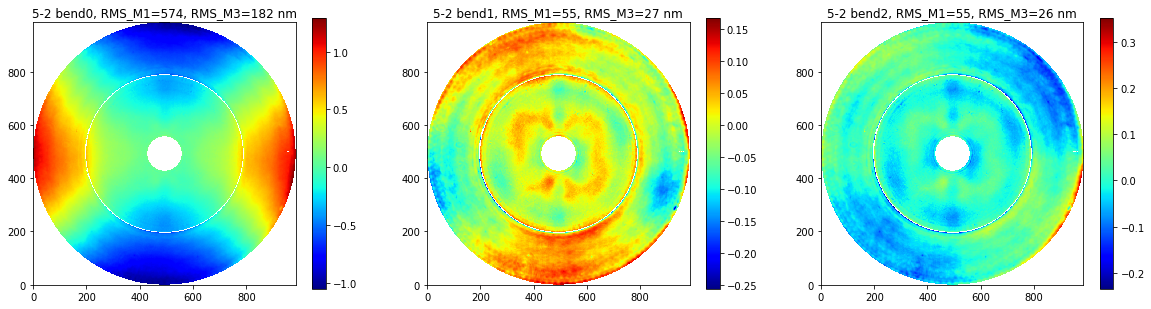

In [10]:
testID = '5-2'
iter = 'a'
fig, ax = plt.subplots(1,3,figsize=(20,5*1))
i = 0
for bend in range(3):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))
    pattern = '%s/Processed/%d_%s%s/M1M3 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)
    fileset = sorted(glob.glob(pattern))
    print(pattern)
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset,'/M1Data')
    m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset,'/M3Data')
        
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    if len(fileset) == 0:
        img = ax[irow][icol].imshow(m1s, origin='lowerleft')
        ax[irow][icol].set_title('%s%s bend%d, RMS_M1=%.0f nm'%(testID,iter, bend, m1rms))
    else:
        [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
        [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
        s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
        img = ax[icol].imshow(s, origin='lowerleft')  
        ax[icol].set_title('%s bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, bend, m1rms, m3rms))
    fig.colorbar(img, ax=ax[icol])  

/Users/bxin/largeData/M1M3_ML/Processed/190215_5-2a/M1M3 set0 190215 5-2M1M3 fit mode amps.csv
/Users/bxin/largeData/M1M3_ML/Processed/190215_5-2a/M1M3 set1 190215 5-2M1M3 fit mode amps.csv
/Users/bxin/largeData/M1M3_ML/Processed/190215_5-2a/M1M3 set2 190215 5-2M1M3 fit mode amps.csv


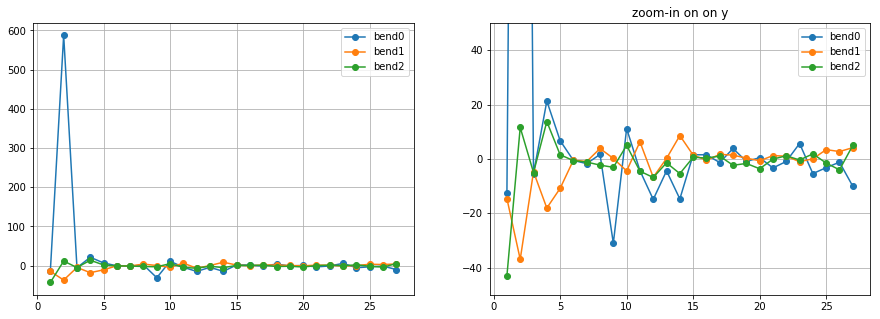

In [8]:
testID = '5-2'
iter = 'a'
fig, ax = plt.subplots(1,2, figsize=(15,5))
for bend in range(3):
    csvName = '%s/Processed/%d_%s%s/M1M3 set%d %s %sM1M3 fit mode amps.csv'%(
            dataDir, dateID, testID, iter, bend, dateID, testID)
    if not os.path.isfile(csvName):
        csvName = '%s/Processed/%d_%s%s/M1 set%d %s %s -FC fit mode amps.csv'%(
            dataDir, dateID, testID, iter, bend, dateID, testID)
    print(csvName)
    df = pd.read_csv(csvName, header=None)
    ax[0].plot(df[0], df[1], '-o', label='bend%d'%bend)
    ax[1].plot(df[0], df[1], '-o', label='bend%d'%bend)
leg = ax[0].legend()
leg = ax[1].legend()
ax[0].grid()
ax[1].grid()
ax[1].set_title('zoom-in on on y')
aa = ax[1].set_ylim([-50, 50])
#fig.delaxes(ax.flatten()[-1]) 

5-2 bend2 ------ irow = 0, icol = 0, -----------------------------
/Processed/190215_5-2b/M1 set2 190215 5-2.h5: Fri Feb 15 15:12:15 2019 


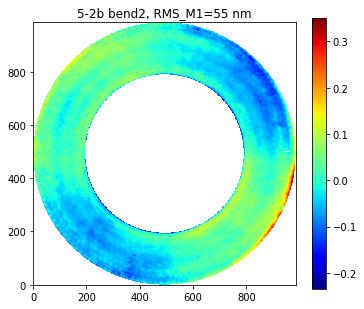

In [14]:
testID = '5-2'
iter = 'b'
fig, ax = plt.subplots(1,3,figsize=(20,5*1))
i = 0
for bend in range(2,3):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))

    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M1 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M3 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    if len(fileset) == 0:
        pass
    else:
        m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset)
        
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    if len(fileset) == 0:
        img = ax[icol].imshow(m1s, origin='lowerleft')
        ax[icol].set_title('%s%s bend%d, RMS_M1=%.0f nm'%(testID,iter, bend, m1rms))
    else:
        [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
        [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
        s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
        img = ax[icol].imshow(s, origin='lowerleft')  
        ax[icol].set_title('%s bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, bend, m1rms, m3rms))
    fig.colorbar(img, ax=ax[icol])
fig.delaxes(ax.flatten()[-2])    
fig.delaxes(ax.flatten()[-1])    

/Users/bxin/largeData/M1M3_ML/Processed/190215_5-2b/M1 set2 190215 5-2 -FC fit mode amps.csv


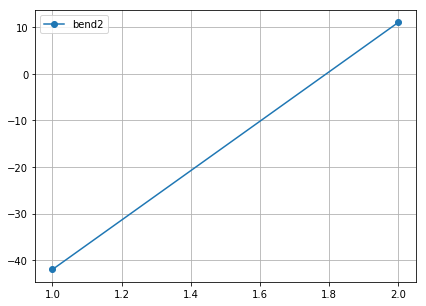

In [9]:
testID = '5-2'
iter = 'b'
fig, ax = plt.subplots(1,2, figsize=(15,5))
for bend in range(2,3):
    csvName = '%s/Processed/%d_%s%s/M1M3 set%d %s %sM1M3 fit mode amps.csv'%(
            dataDir, dateID, testID, iter, bend, dateID, testID)
    if not os.path.isfile(csvName):
        csvName = '%s/Processed/%d_%s%s/M1 set%d %s %s -FC fit mode amps.csv'%(
            dataDir, dateID, testID, iter, bend, dateID, testID)
    print(csvName)
    df = pd.read_csv(csvName, header=None)
    ax[0].plot(df[0], df[1], '-o', label='bend%d'%bend)
    ax[1].plot(df[0], df[1], '-o', label='bend%d'%bend)
leg = ax[0].legend()
leg = ax[1].legend()
ax[0].grid()
ax[1].grid()
ax[1].set_title('zoom-in on on y')
aa = ax[1].set_ylim([-50, 50])
fig.delaxes(ax.flatten()[-1]) 

5-2 bend2 ------ irow = 0, icol = 0, -----------------------------
/Processed/190215_5-2c/M1 set2 190215 5-2.h5: Fri Feb 15 15:12:15 2019 
5-2 bend3 ------ irow = 0, icol = 1, -----------------------------
/Processed/190215_5-2c/M1 set3 190215 5-2.h5: Fri Feb 15 15:41:17 2019 
/Processed/190215_5-2c/M3 set3 190215 5-2.h5: Fri Feb 15 15:40:59 2019 


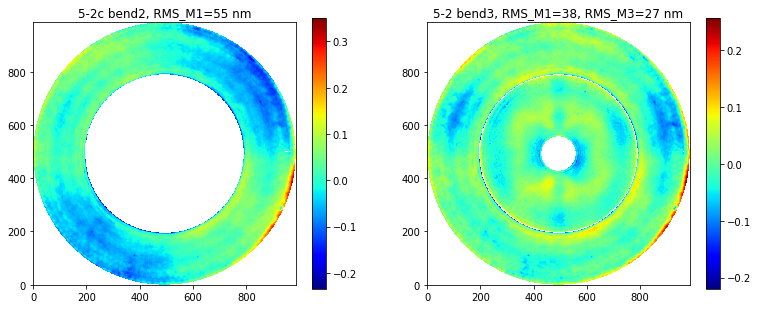

In [15]:
testID = '5-2'
iter = 'c'
fig, ax = plt.subplots(1,3,figsize=(20,5*1))
i = 0
for bend in range(2,4):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))

    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M1 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M3 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    if len(fileset) == 0:
        pass
    else:
        m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset)
        
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    if len(fileset) == 0:
        img = ax[icol].imshow(m1s, origin='lowerleft')
        ax[icol].set_title('%s%s bend%d, RMS_M1=%.0f nm'%(testID,iter, bend, m1rms))
    else:
        [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
        [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
        s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
        img = ax[icol].imshow(s, origin='lowerleft')  
        ax[icol].set_title('%s bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, bend, m1rms, m3rms))
    fig.colorbar(img, ax=ax[icol])
#fig.delaxes(ax.flatten()[-2])    
fig.delaxes(ax.flatten()[-1])    

/Users/bxin/largeData/M1M3_ML/Processed/190215_5-2c/M1 set2 190215 5-2 -FC fit mode amps.csv
/Users/bxin/largeData/M1M3_ML/Processed/190215_5-2c/M1M3 set3 190215 5-2M1M3 fit mode amps.csv


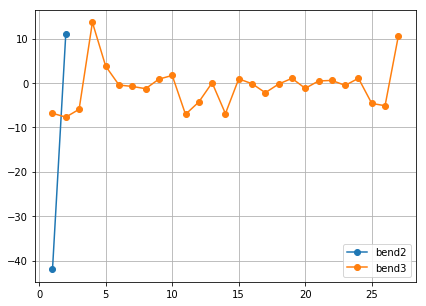

In [10]:
testID = '5-2'
iter = 'c'
fig, ax = plt.subplots(1,2, figsize=(15,5))
for bend in range(2,4):
    csvName = '%s/Processed/%d_%s%s/M1M3 set%d %s %sM1M3 fit mode amps.csv'%(
            dataDir, dateID, testID, iter, bend, dateID, testID)
    if not os.path.isfile(csvName):
        csvName = '%s/Processed/%d_%s%s/M1 set%d %s %s -FC fit mode amps.csv'%(
            dataDir, dateID, testID, iter, bend, dateID, testID)
    print(csvName)
    df = pd.read_csv(csvName, header=None)
    ax[0].plot(df[0], df[1], '-o', label='bend%d'%bend)
    ax[1].plot(df[0], df[1], '-o', label='bend%d'%bend)
leg = ax[0].legend()
leg = ax[1].legend()
ax[0].grid()
ax[1].grid()
ax[1].set_title('zoom-in on on y')
aa = ax[1].set_ylim([-50, 50])
fig.delaxes(ax.flatten()[-1]) 